In [4]:
import pandas as pd

# CSV 파일을 읽어옵니다
df = pd.read_csv('sampling_8Q.csv')

# 칼럼 이름들을 출력합니다
print(df.columns)
df.head(10)

Index(['Unnamed: 0', 'BAS_YH', 'SEQ', 'AGE', 'SEX_CD', 'MBR_RK', 'ATT_YM',
       'HOUS_SIDO_NM', 'DIGT_CHNL_REG_YN', 'DIGT_CHNL_USE_YN', 'LIFE_STAGE',
       'TOT_USE_AM', 'CRDSL_USE_AM', 'CNF_USE_AM', 'INTERIOR_AM', 'INSUHOS_AM',
       'OFFEDU_AM', 'TRVLEC_AM', 'FSBZ_AM', 'SVCARC_AM', 'DIST_AM',
       'PLSANIT_AM', 'CLOTHGDS_AM', 'AUTO_AM', 'BAS_YH_numeric', 'ASSETS',
       'DEBT', 'INCOME', 'BAS_YH_year', 'UES_INCOME', 'CRDSL_DEP', 'DAN_RT',
       'ATT_PERIOD', 'DEBT_RATIO', 'LIFE_STAGE_DAN'],
      dtype='object')


,Unnamed: 0,BAS_YH,SEQ,AGE,SEX_CD,MBR_RK,ATT_YM,HOUS_SIDO_NM,DIGT_CHNL_REG_YN,DIGT_CHNL_USE_YN,...,ASSETS,DEBT,INCOME,BAS_YH_year,UES_INCOME,CRDSL_DEP,DAN_RT,ATT_PERIOD,DEBT_RATIO,LIFE_STAGE_DAN
0,162,2022q1,001UXEKUYPPXM8YP0MDR,55.0,1,22,199602,경북,N,N,...,21125.053979,30058.444877,16108.249666,2022,0.127885,0.907767,0.150485,29,1.422881,0
1,163,2022q2,001UXEKUYPPXM8YP0MDR,55.0,1,22,199602,경북,N,N,...,21125.053979,30058.444877,16108.249666,2022,0.127885,0.907767,0.174757,29,1.422881,0
2,164,2022q3,001UXEKUYPPXM8YP0MDR,55.0,1,22,199602,경북,Y,Y,...,21125.053979,30058.444877,16108.249666,2022,0.127885,0.907767,0.155340,29,1.422881,0
3,165,2022q4,001UXEKUYPPXM8YP0MDR,55.0,1,22,199602,경북,Y,Y,...,21125.053979,30058.444877,16108.249666,2022,0.127885,0.907767,0.155340,29,1.422881,0
4,166,2023q1,001UXEKUYPPXM8YP0MDR,55.0,1,21,199602,경북,Y,Y,...,21948.931084,31230.724227,16736.471403,2023,0.123084,0.907767,0.150485,29,1.422881,0
5,167,2023q2,001UXEKUYPPXM8YP0MDR,55.0,1,21,199602,경북,Y,Y,...,21948.931084,31230.724227,16736.471403,2023,0.123084,0.907767,0.179612,29,1.422881,0
6,168,2023q3,001UXEKUYPPXM8YP0MDR,55.0,1,21,199602,경북,Y,Y,...,21948.931084,31230.724227,16736.471403,2023,0.123084,0.907767,0.155340,29,1.422881,0
7,169,2023q4,001UXEKUYPPXM8YP0MDR,55.0,1,21,199602,경북,Y,Y,...,21948.931084,31230.724227,16736.471403,2023,0.123084,0.907767,0.169903,29,1.422881,0
8,361,2022q1,003JQRAZLZOLFQTAH39N,30.0,1,25,201404,경기,N,N,...,12554.372787,37723.137381,16277.934808,2022,0.008601,0.000000,0.000000,11,3.004781,0
9,362,2022q2,003JQRAZLZOLFQTAH39N,30.0,1,25,201404,경기,N,N,...,12554.372787,37723.137381,16277.934808,2022,0.006143,0.000000,0.000000,11,3.004781,0


In [8]:
import pandas as pd
import numpy as np

def drop_infinite_rows(df, verbose=True):
    """
    무한값이 있는 행을 제거하는 함수

    Parameters:
    df (pandas.DataFrame): 처리할 데이터프레임
    verbose (bool): 상세 정보 출력 여부

    Returns:
    pandas.DataFrame: 무한값이 제거된 데이터프레임
    """
    # 처리 전 행 수
    initial_rows = len(df)

    if verbose:
        print("=== 무한값 행 제거 보고서 ===\n")
        print(f"처리 전 행 수: {initial_rows:,}")

    # 수치형 컬럼만 선택
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    # 무한값이 있는 행의 인덱스 찾기
    inf_mask = pd.concat([df[col].isin([float('inf'), float('-inf')]) for col in numeric_cols], axis=1).any(axis=1)
    inf_rows = df.index[inf_mask]

    if verbose and len(inf_rows) > 0:
        print(f"\n제거될 행 수: {len(inf_rows):,}")
        print(f"제거될 행 비율: {(len(inf_rows)/initial_rows)*100:.3f}%")

        # 무한값이 있는 행의 해당 값들 출력
        print("\n무한값이 있는 행들의 CRDSL_DEP, DAN_RT 값:")
        print(df.loc[inf_rows, ['CRDSL_DEP', 'DAN_RT']])

    # 무한값이 있는 행 제거
    df_cleaned = df.drop(index=inf_rows)

    if verbose:
        print(f"\n처리 후 행 수: {len(df_cleaned):,}")
        print(f"남은 행 비율: {(len(df_cleaned)/initial_rows)*100:.3f}%")

        # 처리 후 해당 컬럼들의 기본 통계량 출력
        print("\n처리 후 CRDSL_DEP 통계량:")
        print(df_cleaned['CRDSL_DEP'].describe())
        print("\n처리 후 DAN_RT 통계량:")
        print(df_cleaned['DAN_RT'].describe())

    return df_cleaned

# 데이터 로드 및 처리
df = pd.read_csv('sampling_8Q.csv')
df_cleaned = drop_infinite_rows(df)

# 처리된 데이터 저장 (선택사항)
# df_cleaned.to_csv('sampling_8Q_cleaned.csv', index=False)

=== 무한값 행 제거 보고서 ===

처리 전 행 수: 720,008

제거될 행 수: 215
제거될 행 비율: 0.030%

무한값이 있는 행들의 CRDSL_DEP, DAN_RT 값:
        CRDSL_DEP  DAN_RT
24            NaN     inf
2167          NaN     inf
7784          inf     inf
8241          NaN     inf
9852          inf     NaN
...           ...     ...
699690        NaN     inf
703461        inf     inf
704200        NaN     inf
704839        NaN     inf
718967        NaN     inf

[215 rows x 2 columns]

처리 후 행 수: 719,793
남은 행 비율: 99.970%

처리 후 CRDSL_DEP 통계량:
count    719466.000000
mean          0.699497
std           0.418555
min           0.000000
25%           0.241379
50%           1.000000
75%           1.000000
max          38.250000
Name: CRDSL_DEP, dtype: float64

처리 후 DAN_RT 통계량:
count    719466.000000
mean          0.089128
std           0.146915
min           0.000000
25%           0.000000
50%           0.028571
75%           0.125000
max          10.000000
Name: DAN_RT, dtype: float64


In [12]:
df_cleaned.columns
df_cleaned = df.drop(columns=['Unnamed: 0'])
df_cleaned.columns

Index(['BAS_YH', 'SEQ', 'AGE', 'SEX_CD', 'MBR_RK', 'ATT_YM', 'HOUS_SIDO_NM',
       'DIGT_CHNL_REG_YN', 'DIGT_CHNL_USE_YN', 'LIFE_STAGE', 'TOT_USE_AM',
       'CRDSL_USE_AM', 'CNF_USE_AM', 'INTERIOR_AM', 'INSUHOS_AM', 'OFFEDU_AM',
       'TRVLEC_AM', 'FSBZ_AM', 'SVCARC_AM', 'DIST_AM', 'PLSANIT_AM',
       'CLOTHGDS_AM', 'AUTO_AM', 'BAS_YH_numeric', 'ASSETS', 'DEBT', 'INCOME',
       'BAS_YH_year', 'UES_INCOME', 'CRDSL_DEP', 'DAN_RT', 'ATT_PERIOD',
       'DEBT_RATIO', 'LIFE_STAGE_DAN'],
      dtype='object')

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest

class CreditAnalyzer:
    def __init__(self):
        self.scaler = RobustScaler()
        self.isolation_forest = IsolationForest(
            random_state=42,
            n_estimators=200
        )

    def get_numeric_features(self, df):
        """수치형 특성 추출"""
        # 수치형 컬럼만 선택
        numeric_cols = df.select_dtypes(include=[np.number]).columns

        # 'Unnamed'나 인덱스 관련 컬럼 제외
        features = [col for col in numeric_cols if not col.startswith('Unnamed')]

        # 타겟 변수나 제외할 컬럼이 있다면 여기서 제외
        exclude_cols = ['is_anomaly']  # 필요한 경우 제외할 컬럼 추가
        features = [col for col in features if col not in exclude_cols]

        return features

    def analyze_patterns(self, df, features):
        """각 특성별 이상치 패턴 분석"""
        patterns = []

        for feature in features:
            normal_mean = df[~df['is_anomaly']][feature].mean()
            anomaly_mean = df[df['is_anomaly']][feature].mean()

            if normal_mean != 0:
                diff_percent = ((anomaly_mean - normal_mean) / abs(normal_mean)) * 100
            else:
                diff_percent = 0

            patterns.append({
                'feature': feature,
                'normal_mean': normal_mean,
                'anomaly_mean': anomaly_mean,
                'difference_percent': diff_percent
            })

        return pd.DataFrame(patterns)

    def generate_report(self, df, patterns, features):
        """분석 리포트 생성"""
        print("\n=== 이상치 탐지 분석 보고서 ===")

        print("\n1. 기본 통계")
        print(f"전체 데이터 수: {len(df):,}")
        print(f"이상치 데이터 수: {df['is_anomaly'].sum():,}")
        print(f"이상치 비율: {(df['is_anomaly'].sum() / len(df)) * 100:.2f}%")

        if 'LIFE_STAGE' in df.columns:
            print("\n2. 생애주기별 이상치 분포")
            life_stage_dist = pd.crosstab(df['LIFE_STAGE'], df['is_anomaly'], normalize='index') * 100
            print(life_stage_dist)

        print("\n3. 주요 특성 차이")
        # 차이가 큰 상위 특성들
        print("\n[특성 차이 (상위 10개)]")
        top_patterns = patterns.sort_values('difference_percent', ascending=False)
        print(top_patterns.head(10).round(2))

        # 차이가 작은 특성들
        print("\n[특성 차이 (하위 10개)]")
        bottom_patterns = patterns.sort_values('difference_percent', ascending=True)
        print(bottom_patterns.head(10).round(2))

        print("\n4. 이상치 그룹 특성 상세 분석")
        # 차이가 가장 큰 상위 5개 특성에 대해 상세 분석
        top_features = top_patterns['feature'].head().tolist()
        for feature in top_features:
            print(f"\n{feature} 분포:")

            # 정상 그룹의 분위수
            normal_quantiles = df[~df['is_anomaly']][feature].quantile([0.25, 0.5, 0.75]).values
            print(f"정상 그룹 - 25/50/75 백분위수: [{normal_quantiles[0]:.2f} {normal_quantiles[1]:.2f} {normal_quantiles[2]:.2f}]")

            # 이상치 그룹의 분위수
            anomaly_quantiles = df[df['is_anomaly']][feature].quantile([0.25, 0.5, 0.75]).values
            print(f"이상치 그룹 - 25/50/75 백분위수: [{anomaly_quantiles[0]:.2f} {anomaly_quantiles[1]:.2f} {anomaly_quantiles[2]:.2f}]")

def main():
    # 분석기 초기화
    analyzer = CreditAnalyzer()

    # 데이터 로드
    df = pd.read_csv('sampling_8Q.csv')

    # 전처리: 무한값을 NaN으로 변경 후 중앙값으로 대체
    for col in df.select_dtypes(include=[np.number]).columns:
        inf_count = df[col].isin([float('inf'), float('-inf')]).sum()
        if inf_count > 0:
            print(f"{col}: {inf_count}개의 무한값 발견")
        df[col] = df[col].replace([float('inf'), float('-inf')], np.nan)
        df[col] = df[col].fillna(df[col].median())

    # 분석할 특성 자동 선택
    features = analyzer.get_numeric_features(df)

    # 이상치 탐지를 위한 데이터 스케일링 및 탐지 수행
    scaled_data = analyzer.scaler.fit_transform(df[features])
    df['is_anomaly'] = analyzer.isolation_forest.fit_predict(scaled_data) == -1

    # 패턴 분석
    patterns = analyzer.analyze_patterns(df, features)

    # 리포트 생성
    analyzer.generate_report(df, patterns, features)

if __name__ == "__main__":
    main()

CRDSL_DEP: 29개의 무한값 발견
DAN_RT: 198개의 무한값 발견

=== 이상치 탐지 분석 보고서 ===

1. 기본 통계
전체 데이터 수: 720,008
이상치 데이터 수: 111,472
이상치 비율: 15.48%

2. 생애주기별 이상치 분포
is_anomaly      False      True 
LIFE_STAGE                      
CHILD_BABY  83.438680  16.561320
CHILD_TEEN  85.020644  14.979356
CHILD_UNI   84.430848  15.569152
GOLLIFE     89.924092  10.075908
NEW_JOB     88.144047  11.855953
NEW_WED     83.094051  16.905949
RETIR       48.700650  51.299350
SECLIFE     87.712908  12.287092
UNI         74.798764  25.201236

3. 주요 특성 차이

[특성 차이 (상위 10개)]
         feature  normal_mean  anomaly_mean  difference_percent
14    PLSANIT_AM         3.01         16.67              453.69
10     TRVLEC_AM         9.90         50.42              409.37
15   CLOTHGDS_AM         2.24         11.32              406.07
7    INTERIOR_AM         1.11          4.87              337.14
16       AUTO_AM        15.87         68.65              332.48
22    UES_INCOME         0.02          0.08              279.36
4     TOT_US

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest

class CreditAnalyzer:
    def __init__(self):
        self.scaler = RobustScaler()
        self.isolation_forest = IsolationForest(
            random_state=42,
            n_estimators=200
        )

    def get_numeric_features(self, df):
        """수치형 특성 추출"""
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        features = [col for col in numeric_cols if not col.startswith('Unnamed')]
        exclude_cols = ['is_anomaly']
        features = [col for col in features if col not in exclude_cols]
        return features

    def add_risk_score(self, df):
        """이상치 탐지 결과를 바탕으로 risk_score 추가"""
        df['risk_score'] = np.where(df['is_anomaly'], '불량', '우량')

        # 기본 통계 출력
        risk_counts = df['risk_score'].value_counts()
        print("\n=== Risk Score 분포 ===")
        print("\n레이블별 건수:")
        print(f"우량: {risk_counts['우량']:,}건 ({risk_counts['우량']/len(df)*100:.2f}%)")
        print(f"불량: {risk_counts['불량']:,}건 ({risk_counts['불량']/len(df)*100:.2f}%)")

        # 생애주기별 risk_score 분포
        if 'LIFE_STAGE' in df.columns:
            print("\n생애주기별 Risk Score 분포:")
            life_stage_risk = pd.crosstab(df['LIFE_STAGE'], df['risk_score'], normalize='index') * 100
            print(life_stage_risk.round(2))

        return df

def main():
    # 분석기 초기화
    analyzer = CreditAnalyzer()

    # 데이터 로드
    df = pd.read_csv('sampling_8Q.csv')

    # 전처리: 무한값을 NaN으로 변경 후 중앙값으로 대체
    for col in df.select_dtypes(include=[np.number]).columns:
        inf_count = df[col].isin([float('inf'), float('-inf')]).sum()
        if inf_count > 0:
            print(f"{col}: {inf_count}개의 무한값 발견")
        df[col] = df[col].replace([float('inf'), float('-inf')], np.nan)
        df[col] = df[col].fillna(df[col].median())

    # 분석할 특성 자동 선택
    features = analyzer.get_numeric_features(df)

    # 이상치 탐지
    scaled_data = analyzer.scaler.fit_transform(df[features])
    df['is_anomaly'] = analyzer.isolation_forest.fit_predict(scaled_data) == -1

    # risk_score 추가
    df = analyzer.add_risk_score(df)

    # 결과 저장 (선택사항)
    df.to_csv('sampling_8Q_with_risk.csv', index=False)

    return df

if __name__ == "__main__":
    df_result = main()

# 결과 데이터프레임의 처음 몇 행 확인
print("\n처음 5개 행의 risk_score:")
print(df_result[['LIFE_STAGE', 'is_anomaly', 'risk_score']].head())

CRDSL_DEP: 29개의 무한값 발견
DAN_RT: 198개의 무한값 발견

=== Risk Score 분포 ===

레이블별 건수:
우량: 608,536건 (84.52%)
불량: 111,472건 (15.48%)

생애주기별 Risk Score 분포:
risk_score     불량     우량
LIFE_STAGE              
CHILD_BABY  16.56  83.44
CHILD_TEEN  14.98  85.02
CHILD_UNI   15.57  84.43
GOLLIFE     10.08  89.92
NEW_JOB     11.86  88.14
NEW_WED     16.91  83.09
RETIR       51.30  48.70
SECLIFE     12.29  87.71
UNI         25.20  74.80

처음 5개 행의 risk_score:
  LIFE_STAGE  is_anomaly risk_score
0  CHILD_UNI        True         불량
1  CHILD_UNI        True         불량
2  CHILD_UNI        True         불량
3  CHILD_UNI        True         불량
4  CHILD_UNI        True         불량


In [5]:
import pandas as pd
import numpy as np

def analyze_column_types(df):
    """
    데이터프레임의 각 칼럼 타입을 분석하는 함수

    Parameters:
    df (pandas.DataFrame): 분석할 데이터프레임

    Returns:
    tuple: (numerical_columns, categorical_columns, column_analysis_df)
    """
    # 분석 결과를 저장할 리스트
    column_info = []

    # Unnamed 칼럼 제거
    df = df.loc[:, ~df.columns.str.contains('Unnamed')]

    for column in df.columns:
        # 기본 정보
        dtype = df[column].dtype
        unique_count = df[column].nunique()
        null_count = df[column].isnull().sum()
        null_percentage = (null_count / len(df)) * 100

        # 샘플 값
        sample_values = df[column].dropna().sample(min(5, len(df))).values

        # 데이터 타입 판단
        if pd.api.types.is_numeric_dtype(df[column]):
            if df[column].nunique() < 10:  # 고유값이 적은 경우 범주형으로 간주할 수 있음
                type_suggestion = "범주형(숫자)"
            else:
                type_suggestion = "수치형"
        else:
            type_suggestion = "범주형"

        # 최빈값과 그 비율
        mode_value = df[column].mode().iloc[0]
        mode_percentage = (df[column] == mode_value).mean() * 100

        column_info.append({
            'column_name': column,
            'data_type': str(dtype),
            'unique_values': unique_count,
            'null_count': null_count,
            'null_percentage': null_percentage,
            'type_suggestion': type_suggestion,
            'mode_value': mode_value,
            'mode_percentage': mode_percentage,
            'sample_values': str(sample_values)[:50] + '...' if len(str(sample_values)) > 50 else str(sample_values)
        })

    # 결과를 데이터프레임으로 변환
    analysis_df = pd.DataFrame(column_info)

    # 수치형/범주형 컬럼 리스트 생성
    numerical_columns = analysis_df[analysis_df['type_suggestion'] == '수치형']['column_name'].tolist()
    categorical_columns = analysis_df[analysis_df['type_suggestion'].isin(['범주형', '범주형(숫자)'])]['column_name'].tolist()

    # 결과 출력
    print("=== 컬럼 타입 분석 결과 ===\n")

    print(f"전체 컬럼 수: {len(df.columns)}")
    print(f"수치형 컬럼 수: {len(numerical_columns)}")
    print(f"범주형 컬럼 수: {len(categorical_columns)}\n")

    print("=== 각 컬럼 상세 분석 ===\n")
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.width', None)
    print(analysis_df.round(2))

    print("\n=== 수치형 컬럼 목록 ===")
    print(numerical_columns)

    print("\n=== 범주형 컬럼 목록 ===")
    print(categorical_columns)

    return numerical_columns, categorical_columns, analysis_df

# 데이터 로드 및 분석 실행
df = pd.read_csv('sampling_8Q_with_risk.csv')
numerical_cols, categorical_cols, analysis_results = analyze_column_types(df)

# 추가적인 분석 (선택사항)
print("\n=== 범주형 변수 고유값 분포 ===")
for col in categorical_cols:
    print(f"\n{col} 분포:")
    print(df[col].value_counts().head().to_frame())

=== 컬럼 타입 분석 결과 ===

전체 컬럼 수: 36
수치형 컬럼 수: 20
범주형 컬럼 수: 16

=== 각 컬럼 상세 분석 ===

         column_name data_type  unique_values  null_count  null_percentage type_suggestion  \
0             BAS_YH    object              8           0              0.0             범주형   
1                SEQ    object          90001           0              0.0             범주형   
2                AGE   float64             14           0              0.0             수치형   
3             SEX_CD     int64              2           0              0.0         범주형(숫자)   
4             MBR_RK     int64              5           0              0.0         범주형(숫자)   
5             ATT_YM     int64            464           0              0.0             수치형   
6       HOUS_SIDO_NM    object             17           0              0.0             범주형   
7   DIGT_CHNL_REG_YN    object              2           0              0.0             범주형   
8   DIGT_CHNL_USE_YN    object              2           0              0.0

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

def prepare_data(df):
    """데이터 전처리"""
    # 불필요한 컬럼 제거
    df = df.drop(['Unnamed: 0', 'SEQ', 'is_anomaly'], axis=1, errors='ignore')

    # 범주형 변수 처리
    le = LabelEncoder()
    categorical_cols = ['BAS_YH', 'HOUS_SIDO_NM', 'DIGT_CHNL_REG_YN',
                       'DIGT_CHNL_USE_YN', 'LIFE_STAGE']

    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])

    # 종속변수 변환
    df['risk_score'] = (df['risk_score'] == '불량').astype(int)

    return df

def analyze_importance_and_regression(df):
    """Random Forest 변수 중요도 분석 및 로지스틱 회귀 수행"""
    # 데이터 준비
    X = df.drop('risk_score', axis=1)
    y = df['risk_score']

    # 변수 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # 1. Random Forest로 변수 중요도 분석
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_scaled, y)

    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    print("=== Random Forest 변수 중요도 (상위 15개) ===")
    print(importance_df.head(15).round(4))

    # 상위 15개 변수 선택
    top_features = importance_df.head(15)['feature'].tolist()
    X_selected = X_scaled[top_features]

    # 2. 로지스틱 회귀 분석
    # statsmodels 사용 (상세한 통계량 제공)
    X_selected = sm.add_constant(X_selected)
    logit_model = sm.Logit(y, X_selected)
    results = logit_model.fit()

    print("\n=== 로지스틱 회귀 분석 결과 ===")
    print(results.summary())

    # Odds Ratio 계산
    print("\n=== Odds Ratio ===")
    odds_ratios = pd.DataFrame({
        'Variable': results.params.index,
        'Odds_Ratio': np.exp(results.params),
        'CI_Lower': np.exp(results.conf_int()[0]),
        'CI_Upper': np.exp(results.conf_int()[1])
    })
    print(odds_ratios.round(4))

    return importance_df, results, odds_ratios

# 데이터 로드 및 분석 실행
df = pd.read_csv('sampling_8Q_with_risk.csv')
df_prepared = prepare_data(df)
importance_df, regression_results, odds_ratios = analyze_importance_and_regression(df_prepared)

# 모델 성능 평가
y_pred_proba = regression_results.predict(sm.add_constant(df_prepared[importance_df.head(15)['feature']]))
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = (y_pred == df_prepared['risk_score']).mean()

print("\n=== 모델 성능 ===")
print(f"정확도: {accuracy:.4f}")

=== Random Forest 변수 중요도 (상위 15개) ===
           feature  importance
9       TOT_USE_AM      0.1734
27      UES_INCOME      0.1712
10    CRDSL_USE_AM      0.1047
11      CNF_USE_AM      0.0482
18         DIST_AM      0.0447
16         FSBZ_AM      0.0429
19      PLSANIT_AM      0.0415
15       TRVLEC_AM      0.0337
29          DAN_RT      0.0286
3           MBR_RK      0.0236
32  LIFE_STAGE_DAN      0.0230
20     CLOTHGDS_AM      0.0221
4           ATT_YM      0.0211
21         AUTO_AM      0.0192
25          INCOME      0.0185
Optimization terminated successfully.
         Current function value: 0.111956
         Iterations 10

=== 로지스틱 회귀 분석 결과 ===
                           Logit Regression Results                           
Dep. Variable:             risk_score   No. Observations:               720008
Model:                          Logit   Df Residuals:                   719992
Method:                           MLE   Df Model:                           15
Date:                Mon

=== Random Forest 변수 중요도 (상위 15개) ===
           feature  importance
8       TOT_USE_AM      0.1991
24      UES_INCOME      0.1807
9     CRDSL_USE_AM      0.0934
10      CNF_USE_AM      0.0590
18      PLSANIT_AM      0.0398
15         FSBZ_AM      0.0350
14       TRVLEC_AM      0.0335
26          DAN_RT      0.0327
17         DIST_AM      0.0324
29  LIFE_STAGE_DAN      0.0220
19     CLOTHGDS_AM      0.0217
3           ATT_YM      0.0215
22            DEBT      0.0197
28      DEBT_RATIO      0.0183
23          INCOME      0.0181
Optimization terminated successfully.
         Current function value: 0.112792
         Iterations 10

=== 로지스틱 회귀 분석 결과 ===
                           Logit Regression Results                           
Dep. Variable:             risk_score   No. Observations:               720008
Model:                          Logit   Df Residuals:                   719991
Method:                           MLE   Df Model:                           16
Date:                Mon

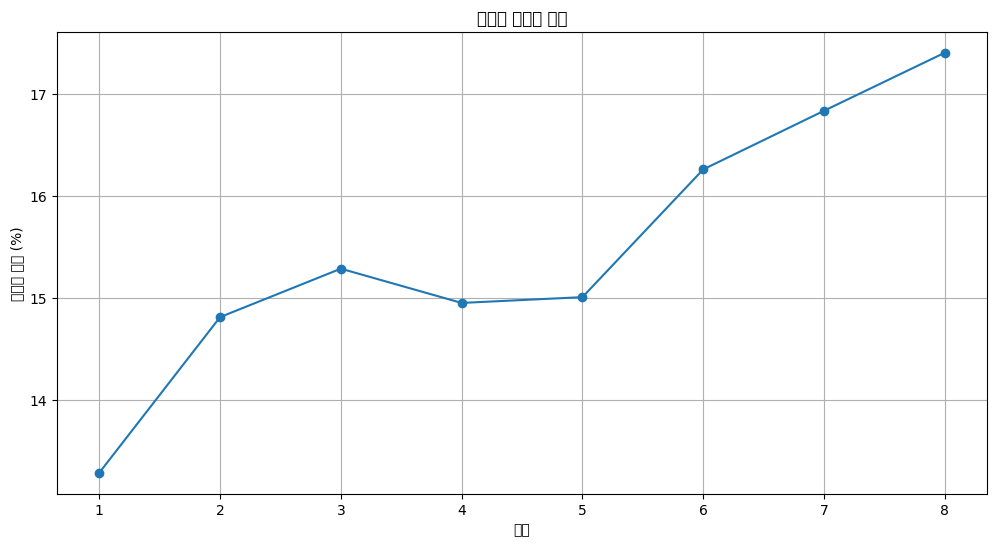

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

def prepare_time_series_data(df):
    """시계열 데이터 전처리"""
    # BAS_YH를 분기 숫자로 변환 (2022Q1을 1로 시작)
    quarter_map = {
        '2022q1': 1, '2022q2': 2, '2022q3': 3, '2022q4': 4,
        '2023q1': 5, '2023q2': 6, '2023q3': 7, '2023q4': 8
    }

    # 분기 정보 변환
    df['quarter_seq'] = df['BAS_YH'].map(quarter_map)

    # 불필요한 컬럼 제거
    columns_to_drop = ['Unnamed: 0', 'SEQ', 'is_anomaly',
                      'BAS_YH_year', 'BAS_YH_numeric', 'BAS_YH']
    df = df.drop(columns_to_drop, axis=1, errors='ignore')

    # 범주형 변수 처리
    categorical_cols = ['HOUS_SIDO_NM', 'DIGT_CHNL_REG_YN',
                       'DIGT_CHNL_USE_YN', 'LIFE_STAGE']

    le = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])

    # 종속변수 변환
    df['risk_score'] = (df['risk_score'] == '불량').astype(int)

    return df

def analyze_time_series_importance_and_regression(df):
    """시계열 고려한 Random Forest 변수 중요도 분석 및 로지스틱 회귀 수행"""
    # 데이터 준비
    X = df.drop('risk_score', axis=1)
    y = df['risk_score']

    # 변수 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # 1. Random Forest로 변수 중요도 분석
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_scaled, y)

    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    print("=== Random Forest 변수 중요도 (상위 15개) ===")
    print(importance_df.head(15).round(4))

    # 상위 15개 변수 선택 (quarter_seq 포함)
    top_features = importance_df.head(15)['feature'].tolist()
    if 'quarter_seq' not in top_features:
        top_features.append('quarter_seq')
    X_selected = X_scaled[top_features]

    # 2. 로지스틱 회귀 분석
    X_selected = sm.add_constant(X_selected)
    logit_model = sm.Logit(y, X_selected)
    results = logit_model.fit()

    print("\n=== 로지스틱 회귀 분석 결과 ===")
    print(results.summary())

    # Odds Ratio 계산
    print("\n=== Odds Ratio ===")
    odds_ratios = pd.DataFrame({
        'Variable': results.params.index,
        'Odds_Ratio': np.exp(results.params),
        'CI_Lower': np.exp(results.conf_int()[0]),
        'CI_Upper': np.exp(results.conf_int()[1])
    })
    print(odds_ratios.round(4))

    # 시계열별 분석
    print("\n=== 분기별 위험도 분포 ===")
    quarter_risk = df.groupby('quarter_seq')['risk_score'].agg(['mean', 'count'])
    quarter_risk['risk_ratio'] = quarter_risk['mean'] * 100
    print(quarter_risk.round(4))

    return importance_df, results, odds_ratios, quarter_risk

def analyze_quarterly_trends(df):
    """분기별 트렌드 분석"""
    print("\n=== 분기별 주요 변수 평균 추이 ===")

    # 상위 5개 중요 변수의 분기별 평균
    important_vars = importance_df.head(5)['feature'].tolist()

    quarterly_means = df.groupby('quarter_seq')[important_vars].mean()
    print(quarterly_means.round(4))

    # 분기별 위험도 변화 시각화
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.plot(quarter_risk.index, quarter_risk['risk_ratio'], marker='o')
    plt.title('분기별 위험도 추이')
    plt.xlabel('분기')
    plt.ylabel('위험도 비율 (%)')
    plt.grid(True)
    plt.show()

# 데이터 로드 및 분석 실행
df = pd.read_csv('sampling_8Q_with_risk.csv')
df_prepared = prepare_time_series_data(df)
importance_df, regression_results, odds_ratios, quarter_risk = analyze_time_series_importance_and_regression(df_prepared)

# 분기별 트렌드 분석
analyze_quarterly_trends(df_prepared)

In [8]:
!pip install koreanize-matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 39.7 MB/s eta 0:00:00


=== Random Forest 변수 중요도 (상위 15개) ===
           feature  importance
8       TOT_USE_AM      0.1991
24      UES_INCOME      0.1807
9     CRDSL_USE_AM      0.0934
10      CNF_USE_AM      0.0590
18      PLSANIT_AM      0.0398
15         FSBZ_AM      0.0350
14       TRVLEC_AM      0.0335
26          DAN_RT      0.0327
17         DIST_AM      0.0324
29  LIFE_STAGE_DAN      0.0220
19     CLOTHGDS_AM      0.0217
3           ATT_YM      0.0215
22            DEBT      0.0197
28      DEBT_RATIO      0.0183
23          INCOME      0.0181
Optimization terminated successfully.
         Current function value: 0.112792
         Iterations 10

=== 로지스틱 회귀 분석 결과 ===
                           Logit Regression Results                           
Dep. Variable:             risk_score   No. Observations:               720008
Model:                          Logit   Df Residuals:                   719991
Method:                           MLE   Df Model:                           16
Date:                Mon

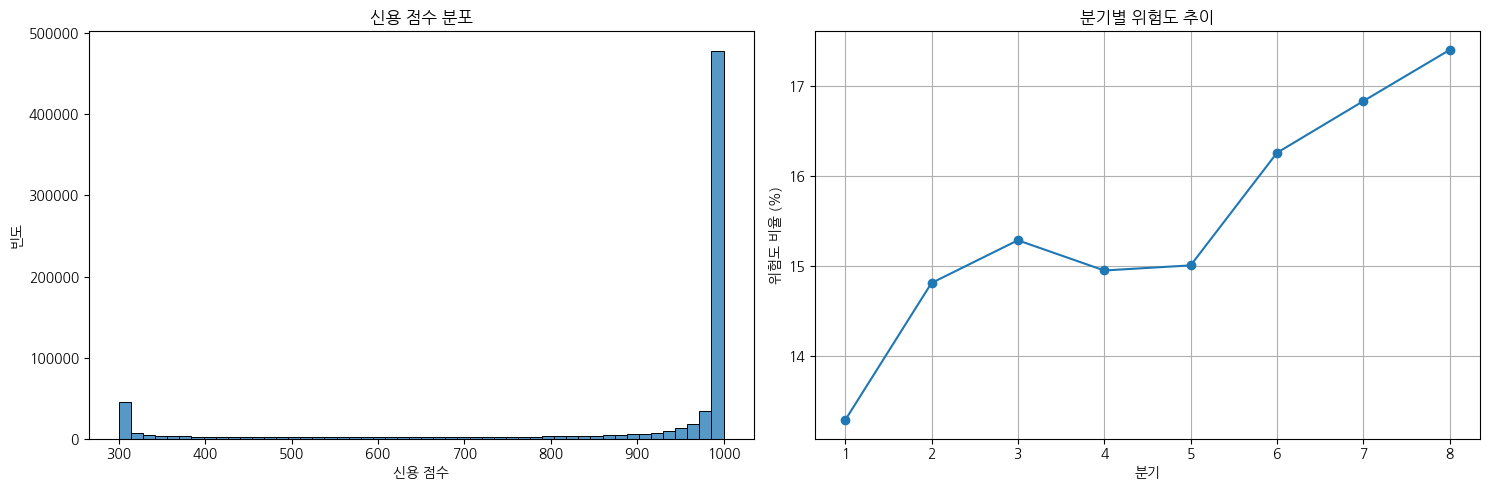


=== 모델 저장 완료 ===
파일명: credit_model.pkl

포함된 정보:
- 로지스틱 회귀 계수
- 필요 변수 목록: ['TOT_USE_AM', 'UES_INCOME', 'CRDSL_USE_AM', 'CNF_USE_AM', 'PLSANIT_AM', 'FSBZ_AM', 'TRVLEC_AM', 'DAN_RT', 'DIST_AM', 'LIFE_STAGE_DAN', 'CLOTHGDS_AM', 'ATT_YM', 'DEBT', 'DEBT_RATIO', 'INCOME', 'quarter_seq']
- StandardScaler
- Random Forest 모델
- 변수 중요도 정보


In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class CreditAnalyzer:
    def __init__(self):
        self.scaler = StandardScaler()
        self.rf = RandomForestClassifier(n_estimators=100, random_state=42)

    ######
    # CreditAnalyzer 클래스에 다음 메서드 추가
    # CreditAnalyzer 클래스에 메서드 추가/수정
    def save_models(self, regression_results, df_prepared, importance_df, file_prefix='credit_model'):
        """모델과 관련 객체들을 피클로 저장"""
        import pickle

        # 상위 15개 중요 변수 선택 (quarter_seq 포함)
        top_features = importance_df.head(15)['feature'].tolist()
        if 'quarter_seq' not in top_features:
            top_features.append('quarter_seq')

        # 최종 사용된 피처들에 대해 스케일러 재학습
        final_scaler = StandardScaler()
        final_scaler.fit(df_prepared[top_features])

        # 1. 모델 정보를 딕셔너리로 구성
        model_info = {
            'coefficients': regression_results.params,
            'feature_names': regression_results.params.index,
            'scaler': final_scaler,
            'rf_model': self.rf,
            'importance_df': importance_df,
            'required_features': top_features
        }

        # 2. 피클 파일로 저장
        with open(f'{file_prefix}.pkl', 'wb') as f:
            pickle.dump(model_info, f)

        print("\n=== 모델 저장 완료 ===")
        print(f"파일명: {file_prefix}.pkl")
        print("\n포함된 정보:")
        print("- 로지스틱 회귀 계수")
        print("- 필요 변수 목록:", top_features)
        print("- StandardScaler")
        print("- Random Forest 모델")
        print("- 변수 중요도 정보")

    ######
    def prepare_data(self, df):
        """시계열 데이터 전처리"""
        # 분기 매핑
        quarter_map = {
            '2022q1': 1, '2022q2': 2, '2022q3': 3, '2022q4': 4,
            '2023q1': 5, '2023q2': 6, '2023q3': 7, '2023q4': 8
        }

        # 분기 정보 변환
        df['quarter_seq'] = df['BAS_YH'].map(quarter_map)

        # 불필요한 컬럼 제거
        columns_to_drop = ['Unnamed: 0', 'SEQ', 'is_anomaly',
                          'BAS_YH_year', 'BAS_YH_numeric', 'BAS_YH']
        df = df.drop(columns_to_drop, axis=1, errors='ignore')

        # 범주형 변수 처리
        categorical_cols = ['HOUS_SIDO_NM', 'DIGT_CHNL_REG_YN',
                          'DIGT_CHNL_USE_YN', 'LIFE_STAGE']

        le = LabelEncoder()
        for col in categorical_cols:
            if col in df.columns:
                df[col] = le.fit_transform(df[col])

        # 종속변수 변환
        df['risk_score'] = (df['risk_score'] == '불량').astype(int)

        return df

    def analyze_importance(self, df):
        """Random Forest 변수 중요도 분석"""
        X = df.drop('risk_score', axis=1)
        y = df['risk_score']

        # 변수 스케일링
        X_scaled = self.scaler.fit_transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

        # Random Forest 학습
        self.rf.fit(X_scaled, y)

        # 변수 중요도 계산
        importance_df = pd.DataFrame({
            'feature': X.columns,
            'importance': self.rf.feature_importances_
        }).sort_values('importance', ascending=False)

        print("=== Random Forest 변수 중요도 (상위 15개) ===")
        print(importance_df.head(15).round(4))

        return importance_df, X_scaled

    def perform_logistic_regression(self, df, importance_df):
        """로지스틱 회귀 분석 수행"""
        # 상위 15개 변수 선택 (quarter_seq 포함)
        top_features = importance_df.head(15)['feature'].tolist()
        if 'quarter_seq' not in top_features:
            top_features.append('quarter_seq')

        X = df[top_features]
        y = df['risk_score']

        # 로지스틱 회귀 분석
        X = sm.add_constant(X)
        logit_model = sm.Logit(y, X)
        results = logit_model.fit()

        print("\n=== 로지스틱 회귀 분석 결과 ===")
        print(results.summary())

        # Odds Ratio 계산
        print("\n=== Odds Ratio ===")
        odds_ratios = pd.DataFrame({
            'Variable': results.params.index,
            'Odds_Ratio': np.exp(results.params),
            'CI_Lower': np.exp(results.conf_int()[0]),
            'CI_Upper': np.exp(results.conf_int()[1])
        })
        print(odds_ratios.round(4))

        return results, odds_ratios

    def calculate_credit_score(self, df, coef):
        """신용 점수 계산"""
        # 상수항을 위한 1 추가
        X = sm.add_constant(df)

        # 계수에 있는 변수들만 선택
        X = X[coef.index]

        # 로짓 점수 계산
        logit_score = np.dot(X, coef)

        # 점수 변환 (300-1000점 범위)
        min_score = 300
        max_score = 1000
        prob = 1 / (1 + np.exp(-logit_score))
        credit_score = min_score + (max_score - min_score) * (1 - prob)

        return credit_score

    def label_credit_score(self, score):
        """신용 점수를 등급으로 변환"""
        if score >= 900:
            return '1등급'
        elif score >= 800:
            return '2등급'
        elif score >= 700:
            return '3등급'
        elif score >= 600:
            return '4등급'
        elif score >= 500:
            return '5등급'
        else:
            return '6등급'

    def analyze_trends(self, df):
        """시계열 트렜드 분석"""
        print("\n=== 분기별 위험도 분포 ===")
        quarter_risk = df.groupby('quarter_seq')['risk_score'].agg(['mean', 'count'])
        quarter_risk['risk_ratio'] = quarter_risk['mean'] * 100
        print(quarter_risk.round(4))

        # 주요 변수의 분기별 평균
        important_vars = df.columns[:5]  # 상위 5개 변수
        print("\n=== 분기별 주요 변수 평균 추이 ===")
        quarterly_means = df.groupby('quarter_seq')[important_vars].mean()
        print(quarterly_means.round(4))

        return quarter_risk, quarterly_means

    def visualize_results(self, df, quarter_risk):
        """결과 시각화"""
        plt.figure(figsize=(15, 5))

        # 신용점수 분포
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x='credit_score', bins=50)
        plt.title('신용 점수 분포')
        plt.xlabel('신용 점수')
        plt.ylabel('빈도')

        # 분기별 위험도 추이
        plt.subplot(1, 2, 2)
        plt.plot(quarter_risk.index, quarter_risk['risk_ratio'], marker='o')
        plt.title('분기별 위험도 추이')
        plt.xlabel('분기')
        plt.ylabel('위험도 비율 (%)')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# main 함수 수정
def main():
    # 분석기 초기화
    analyzer = CreditAnalyzer()

    # 데이터 로드
    df = pd.read_csv('sampling_8Q_with_risk.csv')

    # 데이터 전처리
    df_prepared = analyzer.prepare_data(df)

    # Random Forest 중요도 분석
    importance_df, X_scaled = analyzer.analyze_importance(df_prepared)

    # 로지스틱 회귀 분석
    regression_results, odds_ratios = analyzer.perform_logistic_regression(
        df_prepared, importance_df)

    # 신용 점수 계산
    df_prepared['credit_score'] = analyzer.calculate_credit_score(
        df_prepared[regression_results.params.index[1:]],
        regression_results.params)

    # 신용 등급 라벨링
    df_prepared['credit_grade'] = df_prepared['credit_score'].apply(
        analyzer.label_credit_score)

    # 트렌드 분석
    quarter_risk, quarterly_means = analyzer.analyze_trends(df_prepared)

    # 결과 시각화
    analyzer.visualize_results(df_prepared, quarter_risk)

    # 결과 저장
    df_prepared.to_csv('credit_analysis_results.csv', index=False)

    # 모델 저장
    analyzer.save_models(regression_results, df_prepared, importance_df)

    return df_prepared, regression_results, importance_df

if __name__ == "__main__":
    df_result, regression_results, importance_df = main()

In [17]:
df = pd.read_csv('credit_analysis_results.csv')
df.head()

,AGE,SEX_CD,MBR_RK,ATT_YM,HOUS_SIDO_NM,DIGT_CHNL_REG_YN,DIGT_CHNL_USE_YN,LIFE_STAGE,TOT_USE_AM,CRDSL_USE_AM,CNF_USE_AM,INTERIOR_AM,INSUHOS_AM,OFFEDU_AM,TRVLEC_AM,FSBZ_AM,SVCARC_AM,DIST_AM,PLSANIT_AM,CLOTHGDS_AM,AUTO_AM,ASSETS,DEBT,INCOME,UES_INCOME,CRDSL_DEP,DAN_RT,ATT_PERIOD,DEBT_RATIO,LIFE_STAGE_DAN,risk_score,quarter_seq,credit_score,credit_grade
0,55.0,1,22,199602,3,0,0,2,2060,1870,0,0,20,0,10,30,140,400,0,0,300,21125.053979,30058.444877,16108.249666,0.127885,0.907767,0.150485,29,1.422881,0,1,1,300.162730,6등급
1,55.0,1,22,199602,3,0,0,2,2060,1870,0,0,0,0,60,170,110,300,0,0,300,21125.053979,30058.444877,16108.249666,0.127885,0.907767,0.174757,29,1.422881,0,1,2,300.062066,6등급
2,55.0,1,22,199602,3,1,1,2,2060,1870,0,0,0,0,20,240,160,350,20,0,300,21125.053979,30058.444877,16108.249666,0.127885,0.907767,0.155340,29,1.422881,0,1,3,300.028453,6등급
3,55.0,1,22,199602,3,1,1,2,2060,1870,0,0,360,0,20,110,60,200,70,0,300,21125.053979,30058.444877,16108.249666,0.127885,0.907767,0.155340,29,1.422881,0,1,4,300.001874,6등급
4,55.0,1,21,199602,3,1,1,2,2060,1870,0,0,0,0,10,190,120,200,70,0,300,21948.931084,31230.724227,16736.471403,0.123084,0.907767,0.150485,29,1.422881,0,1,5,300.002108,6등급


In [31]:
import pickle
import pandas as pd
import numpy as np

def predict_credit_score(data, model_path='credit_model.pkl'):
    """저장된 모델을 사용하여 신용점수 예측"""
    # 모델 로드
    with open(model_path, 'rb') as f:
        model_info = pickle.load(f)

    # 모델 정보 추출
    coefficients = model_info['coefficients']
    feature_names = model_info['feature_names']
    scaler = model_info['scaler']

    # 데이터 전처리
    required_features = list(feature_names[1:])  # const 제외
    if not all(feature in data.columns for feature in required_features):
        missing_features = [f for f in required_features if f not in data.columns]
        raise ValueError(f"Missing required features: {missing_features}")

    # 데이터 스케일링
    X = data[required_features]
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=required_features)

    # 상수항 추가
    X_scaled.insert(0, 'const', 1)

    # 신용점수 계산
    logit_score = np.dot(X_scaled, coefficients)
    prob = 1 / (1 + np.exp(-logit_score))
    credit_score = 300 + (1000 - 300) * (1 - prob)

    # 신용등급 부여
    def get_credit_grade(score):
        if score >= 900:
            return '1등급'
        elif score >= 800:
            return '2등급'
        elif score >= 700:
            return '3등급'
        elif score >= 600:
            return '4등급'
        elif score >= 500:
            return '5등급'
        else:
            return '6등급'

    # 결과 반환
    results = pd.DataFrame({
        'credit_score': credit_score,
        'credit_grade': [get_credit_grade(score) for score in credit_score]
    })

    return results

# 사용 예시
if __name__ == "__main__":
    # 새로운 데이터 예시
    # new_data = pd.DataFrame({
    #     'TOT_USE_AM': [500000],
    #     'UES_INCOME': [0.3],
    #     'CRDSL_USE_AM': [400000],
    #     'CNF_USE_AM': [0],
    #     'PLSANIT_AM': [50000],
    #     'FSBZ_AM': [30000],
    #     'TRVLEC_AM': [100000],
    #     'DAN_RT': [0.5],
    #     'DIST_AM': [20000],
    #     'LIFE_STAGE_DAN': [0],
    #     'CLOTHGDS_AM': [30000],
    #     'ATT_YM': [202311],
    #     'DEBT': [10000000],
    #     'DEBT_RATIO': [2.5],
    #     'INCOME': [50000000],
    #     'quarter_seq': [8]
    # })
    new_data = pd.DataFrame({
        'TOT_USE_AM': [750000],
        'UES_INCOME': [0.25],
        'CRDSL_USE_AM': [500000],
        'CNF_USE_AM': [20000],
        'PLSANIT_AM': [60000],
        'FSBZ_AM': [40000],
        'TRVLEC_AM': [120000],
        'DAN_RT': [0.6],
        'DIST_AM': [25000],
        'LIFE_STAGE_DAN': [1],
        'CLOTHGDS_AM': [35000],
        'ATT_YM': [202312],
        'DEBT': [12000000],
        'DEBT_RATIO': [2.8],
        'INCOME': [550000000000000],
        'quarter_seq': [9]
    })

    # 예측 실행
    predictions = predict_credit_score(new_data)
    print("\n예측 결과:")
    print(predictions)


예측 결과:
   credit_score credit_grade
0        1000.0          1등급


# 가중치 감소: UES_INCOME, DAN_RT

# 가중치 증가: CRDSL_USE_AM, DIST_AM

=== Random Forest 변수 중요도 (상위 15개) ===
           feature  importance
8       TOT_USE_AM      0.1991
24      UES_INCOME      0.1807
9     CRDSL_USE_AM      0.0934
10      CNF_USE_AM      0.0590
18      PLSANIT_AM      0.0398
15         FSBZ_AM      0.0350
14       TRVLEC_AM      0.0335
26          DAN_RT      0.0327
17         DIST_AM      0.0324
29  LIFE_STAGE_DAN      0.0220
19     CLOTHGDS_AM      0.0217
3           ATT_YM      0.0215
22            DEBT      0.0197
28      DEBT_RATIO      0.0183
23          INCOME      0.0181
Optimization terminated successfully.
         Current function value: 0.112792
         Iterations 10

=== 로지스틱 회귀 분석 결과 ===
                           Logit Regression Results                           
Dep. Variable:             risk_score   No. Observations:               720008
Model:                          Logit   Df Residuals:                   719991
Method:                           MLE   Df Model:                           16
Date:                Mon

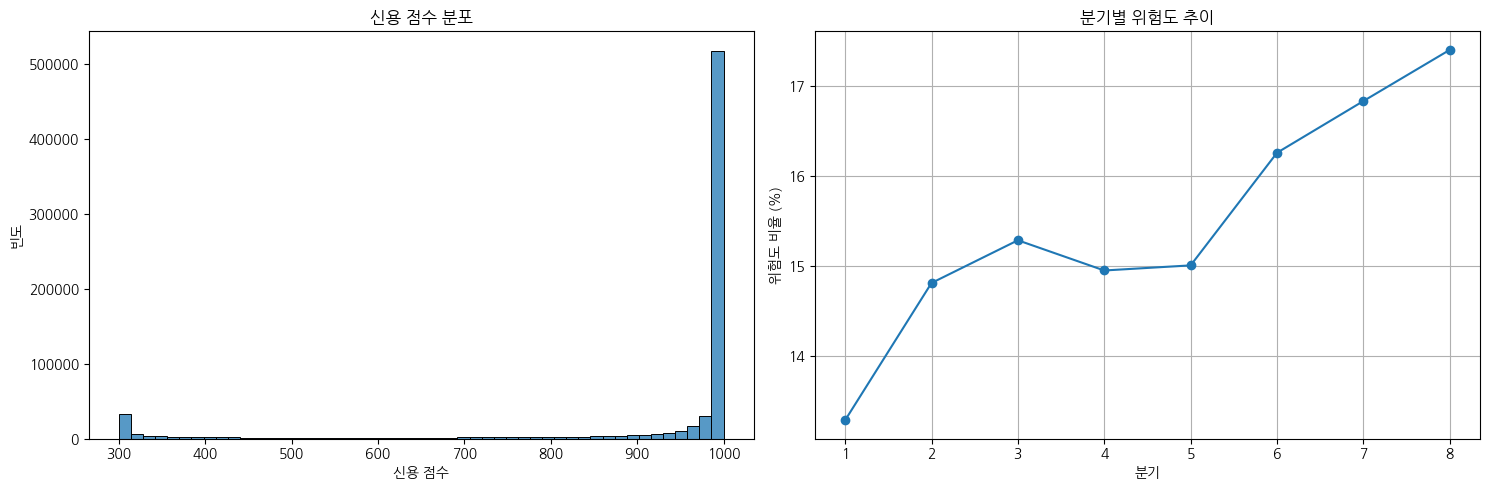


=== 모델 저장 완료 ===
파일명: credit_model.pkl

포함된 정보:
- 로지스틱 회귀 계수
- 필요 변수 목록: ['TOT_USE_AM', 'UES_INCOME', 'CRDSL_USE_AM', 'CNF_USE_AM', 'PLSANIT_AM', 'FSBZ_AM', 'TRVLEC_AM', 'DAN_RT', 'DIST_AM', 'LIFE_STAGE_DAN', 'CLOTHGDS_AM', 'ATT_YM', 'DEBT', 'DEBT_RATIO', 'INCOME', 'quarter_seq']
- StandardScaler
- Random Forest 모델
- 변수 중요도 정보


In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class CreditAnalyzer:
    def __init__(self):
        self.scaler = StandardScaler()
        self.rf = RandomForestClassifier(n_estimators=100, random_state=42)

    ######
    # CreditAnalyzer 클래스에 다음 메서드 추가
    # CreditAnalyzer 클래스에 메서드 추가/수정
    def save_models(self, regression_results, df_prepared, importance_df, file_prefix='credit_model'):
        """모델과 관련 객체들을 피클로 저장"""
        import pickle

        # 상위 15개 중요 변수 선택 (quarter_seq 포함)
        top_features = importance_df.head(15)['feature'].tolist()
        if 'quarter_seq' not in top_features:
            top_features.append('quarter_seq')

        # 최종 사용된 피처들에 대해 스케일러 재학습
        final_scaler = StandardScaler()
        final_scaler.fit(df_prepared[top_features])

        # 1. 모델 정보를 딕셔너리로 구성
        model_info = {
            'coefficients': regression_results.params,
            'feature_names': regression_results.params.index,
            'scaler': final_scaler,
            'rf_model': self.rf,
            'importance_df': importance_df,
            'required_features': top_features
        }

        # 2. 피클 파일로 저장
        with open(f'{file_prefix}.pkl', 'wb') as f:
            pickle.dump(model_info, f)

        print("\n=== 모델 저장 완료 ===")
        print(f"파일명: {file_prefix}.pkl")
        print("\n포함된 정보:")
        print("- 로지스틱 회귀 계수")
        print("- 필요 변수 목록:", top_features)
        print("- StandardScaler")
        print("- Random Forest 모델")
        print("- 변수 중요도 정보")

    ######
    def prepare_data(self, df):
        """시계열 데이터 전처리"""
        # 분기 매핑
        quarter_map = {
            '2022q1': 1, '2022q2': 2, '2022q3': 3, '2022q4': 4,
            '2023q1': 5, '2023q2': 6, '2023q3': 7, '2023q4': 8
        }

        # 분기 정보 변환
        df['quarter_seq'] = df['BAS_YH'].map(quarter_map)

        # 불필요한 컬럼 제거
        columns_to_drop = ['Unnamed: 0', 'SEQ', 'is_anomaly',
                          'BAS_YH_year', 'BAS_YH_numeric', 'BAS_YH']
        df = df.drop(columns_to_drop, axis=1, errors='ignore')

        # 범주형 변수 처리
        categorical_cols = ['HOUS_SIDO_NM', 'DIGT_CHNL_REG_YN',
                          'DIGT_CHNL_USE_YN', 'LIFE_STAGE']

        le = LabelEncoder()
        for col in categorical_cols:
            if col in df.columns:
                df[col] = le.fit_transform(df[col])

        # 종속변수 변환
        df['risk_score'] = (df['risk_score'] == '불량').astype(int)

        return df

    def analyze_importance(self, df):
        """Random Forest 변수 중요도 분석"""
        X = df.drop('risk_score', axis=1)
        y = df['risk_score']

        # 변수 스케일링
        X_scaled = self.scaler.fit_transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

        # Random Forest 학습
        self.rf.fit(X_scaled, y)

        # 변수 중요도 계산
        importance_df = pd.DataFrame({
            'feature': X.columns,
            'importance': self.rf.feature_importances_
        }).sort_values('importance', ascending=False)

        print("=== Random Forest 변수 중요도 (상위 15개) ===")
        print(importance_df.head(15).round(4))

        return importance_df, X_scaled

    def perform_logistic_regression(self, df, importance_df):
        """로지스틱 회귀 분석 수행"""
        # 상위 15개 변수 선택 (quarter_seq 포함)
        top_features = importance_df.head(15)['feature'].tolist()
        if 'quarter_seq' not in top_features:
            top_features.append('quarter_seq')

        X = df[top_features]
        y = df['risk_score']

        # 로지스틱 회귀 분석
        X = sm.add_constant(X)
        logit_model = sm.Logit(y, X)
        results = logit_model.fit()

        print("\n=== 로지스틱 회귀 분석 결과 ===")
        print(results.summary())

        # Odds Ratio 계산
        print("\n=== Odds Ratio ===")
        odds_ratios = pd.DataFrame({
            'Variable': results.params.index,
            'Odds_Ratio': np.exp(results.params),
            'CI_Lower': np.exp(results.conf_int()[0]),
            'CI_Upper': np.exp(results.conf_int()[1])
        })
        print(odds_ratios.round(4))

        return results, odds_ratios

    def calculate_credit_score(self, df, coef):
        """신용 점수 계산 (변수별 가중치 적용)"""
        # 변수별 조정된 가중치 설정
        weight_adjustments = {
            'UES_INCOME': 0.5,  # 가중치 감소
            'DAN_RT': 0.7,      # 가중치 감소
            'CRDSL_USE_AM': 2.0, # 가중치 증가
            'DIST_AM': 2.0       # 가중치 증가
        }

        # 계수 수정: 조정된 가중치를 곱함
        adjusted_coef = coef.copy()
        for var, weight in weight_adjustments.items():
            if var in adjusted_coef.index:
                adjusted_coef[var] *= weight

        # 상수항을 위한 1 추가
        X = sm.add_constant(df)

        # 계수에 있는 변수들만 선택
        X = X[adjusted_coef.index]

        # 로짓 점수 계산
        logit_score = np.dot(X, adjusted_coef)

        # 점수 변환 (300-1000점 범위)
        min_score = 300
        max_score = 1000
        prob = 1 / (1 + np.exp(-logit_score))
        credit_score = min_score + (max_score - min_score) * (1 - prob)

        return credit_score


    def label_credit_score(self, score):
        """신용 점수를 등급으로 변환"""
        if score >= 900:
            return '1등급'
        elif score >= 800:
            return '2등급'
        elif score >= 700:
            return '3등급'
        elif score >= 600:
            return '4등급'
        elif score >= 500:
            return '5등급'
        else:
            return '6등급'

    def analyze_trends(self, df):
        """시계열 트렜드 분석"""
        print("\n=== 분기별 위험도 분포 ===")
        quarter_risk = df.groupby('quarter_seq')['risk_score'].agg(['mean', 'count'])
        quarter_risk['risk_ratio'] = quarter_risk['mean'] * 100
        print(quarter_risk.round(4))

        # 주요 변수의 분기별 평균
        important_vars = df.columns[:5]  # 상위 5개 변수
        print("\n=== 분기별 주요 변수 평균 추이 ===")
        quarterly_means = df.groupby('quarter_seq')[important_vars].mean()
        print(quarterly_means.round(4))

        return quarter_risk, quarterly_means

    def visualize_results(self, df, quarter_risk):
        """결과 시각화"""
        plt.figure(figsize=(15, 5))

        # 신용점수 분포
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x='credit_score', bins=50)
        plt.title('신용 점수 분포')
        plt.xlabel('신용 점수')
        plt.ylabel('빈도')

        # 분기별 위험도 추이
        plt.subplot(1, 2, 2)
        plt.plot(quarter_risk.index, quarter_risk['risk_ratio'], marker='o')
        plt.title('분기별 위험도 추이')
        plt.xlabel('분기')
        plt.ylabel('위험도 비율 (%)')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# main 함수 수정
def main():
    # 분석기 초기화
    analyzer = CreditAnalyzer()

    # 데이터 로드
    df = pd.read_csv('sampling_8Q_with_risk.csv')

    # 데이터 전처리
    df_prepared = analyzer.prepare_data(df)

    # Random Forest 중요도 분석
    importance_df, X_scaled = analyzer.analyze_importance(df_prepared)

    # 로지스틱 회귀 분석
    regression_results, odds_ratios = analyzer.perform_logistic_regression(
        df_prepared, importance_df)

    # 신용 점수 계산
    df_prepared['credit_score'] = analyzer.calculate_credit_score(
        df_prepared[regression_results.params.index[1:]],
        regression_results.params)

    # 신용 등급 라벨링
    df_prepared['credit_grade'] = df_prepared['credit_score'].apply(
        analyzer.label_credit_score)

    # 트렌드 분석
    quarter_risk, quarterly_means = analyzer.analyze_trends(df_prepared)

    # 결과 시각화
    analyzer.visualize_results(df_prepared, quarter_risk)

    # 결과 저장
    df_prepared.to_csv('credit_analysis_results.csv', index=False)

    # 모델 저장
    analyzer.save_models(regression_results, df_prepared, importance_df)

    return df_prepared, regression_results, importance_df

if __name__ == "__main__":
    df_result, regression_results, importance_df = main()